<a href="https://colab.research.google.com/github/bruhenri12/fashion-mnist-dl/blob/dev/ListaPraticaMLPConv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descrição da Atividade

**LISTA PRÁTICA DAS UNIDADES 1 E 2**

Pode ser feita com o grupo do projeto. Recomendo pair/group programming para que todos vejam um pouco de todas as partes.


Treine e avalie 4 modelos de classificação para a base de dados do FashionMNIST (https://www.kaggle.com/datasets/zalando-research/fashionmnist,
https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html).



1.   Um modelo base que não seja uma rede neural, como _decision tree, xgboost, random forest_, etc. Recomendação: use o sklearn (https://scikit-learn.org/).

2.   Uma MLP

3. Uma rede convolucional criada por ti. Recomendação: https://pytorch.org/

4. Use um modelo pré treinado já consolidado na literatura para fazer _transfer learning_. Recomendações: https://pytorch.org/hub/pytorch_vision_vgg/


Compare os resultados dos modelos:
* plote gráficos que mostrem as acurácias de cada modelo
* Indique qual foi a classe na qual o modelo teve pior performance (indique qual métrica usou para concluir isso e faça para cada modelo)
* argumente qual o melhor modelo levando em consideração o tempo de execução e acurácia.

Recomendação use:
https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html .



Recomendação:

Faça um template de treino, validação e teste que funcione para uma API de modelo.

Crie a API para cada modelo que será usado e use o template

# Imports e Downloads

As we're going to measure the execution time of the models, we'll install the ipython-autotime library for showing each cell's execution time.

In [1]:
!pip install -qqq ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.2 MB/s eta 0:00:00
time: 501 µs (started: 2024-01-30 17:53:14 +00:00)


Here we're importing the base libraries for creating the models.



In [2]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.datasets

time: 9.98 s (started: 2024-01-30 17:53:14 +00:00)


In this step, we'll import FashionMNIST's train and test datasets.

First, our desired path for the dataset to be downloaded, that's
our first parameter.

Second, if the desired dataset is the train ( train = True ) or the test ( train = False ) one.

Finally, for comodity, we want the dataset to be downloaded from torchvision, if the dataset already exists at the desired path, it does nothing but import the dataset from the path.

In [3]:
ROOT_PATH = '.data/'
train = torchvision.datasets.FashionMNIST(ROOT_PATH,train=True,download=True)
test = torchvision.datasets.FashionMNIST(ROOT_PATH,train=False,download=True)

100%|██████████| 26421880/26421880 [00:01<00:00, 16434904.17it/s]


Extracting .data/FashionMNIST/raw/train-images-idx3-ubyte.gz to .data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 301541.59it/s]


Extracting .data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to .data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5488651.28it/s]


Extracting .data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to .data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16596677.17it/s]

Extracting .data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to .data/FashionMNIST/raw

time: 5.28 s (started: 2024-01-30 17:53:24 +00:00)


## Now, some info about the datasets

In [4]:
train

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: .data/
    Split: Train

time: 5.59 ms (started: 2024-01-30 17:53:30 +00:00)


In [5]:
test

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: .data/
    Split: Test

time: 3.53 ms (started: 2024-01-30 17:53:30 +00:00)


Let's see if the datasets samples are balanced. This is important to prevent an undesired bias towards the classes that have an majority of samples overfitting them, and underfitting the classes with lower samples.

In [6]:
train_classes_count = {
  'T-shirt/top': 0,
  'Trouser': 0,
  'Pullover': 0,
  'Dress': 0,
  'Coat': 0,
  'Sandal': 0,
  'Shirt': 0,
  'Sneaker': 0,
  'Bag': 0,
  'Ankle boot': 0
}

test_classes_count = {
  'T-shirt/top': 0,
  'Trouser': 0,
  'Pullover': 0,
  'Dress': 0,
  'Coat': 0,
  'Sandal': 0,
  'Shirt': 0,
  'Sneaker': 0,
  'Bag': 0,
  'Ankle boot': 0
}

for t in train.targets:
  train_classes_count[train.classes[t]] += 1

for t in test.targets:
  test_classes_count[test.classes[t]] += 1


time: 1.06 s (started: 2024-01-30 17:53:30 +00:00)


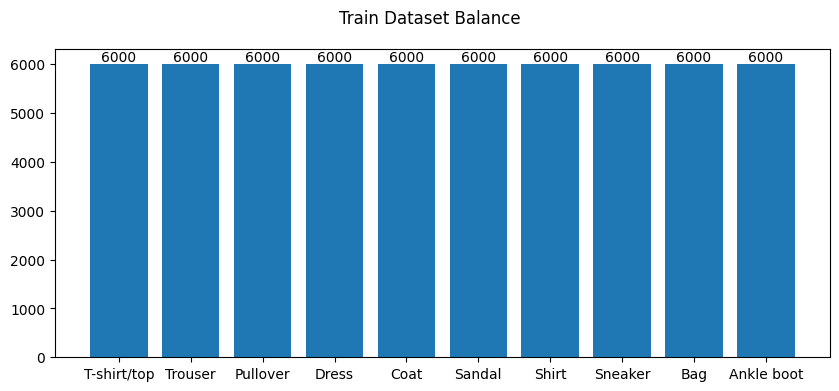

time: 823 ms (started: 2024-01-30 17:53:31 +00:00)


In [7]:
fig, ax = plt.subplots(figsize=(10, 4))
bars = ax.bar(train.classes, train_classes_count.values())
ax.bar_label(bars)
plt.suptitle('Train Dataset Balance')
plt.show()

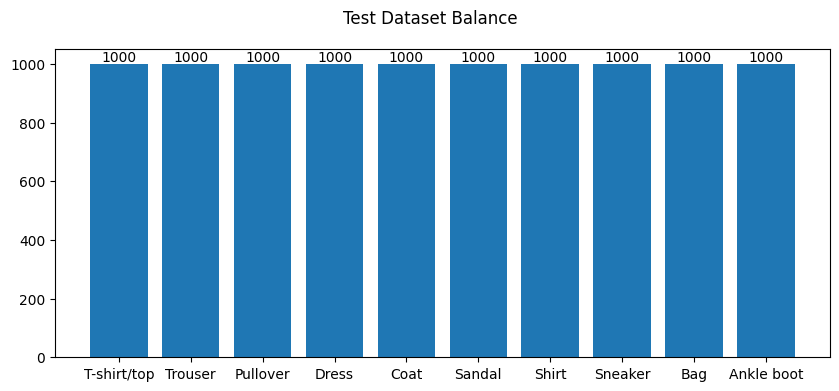

time: 660 ms (started: 2024-01-30 17:53:32 +00:00)


In [8]:
fig, ax = plt.subplots(figsize=(10, 4))
bars = ax.bar(test.classes, test_classes_count.values())
ax.bar_label(bars)
plt.suptitle('Test Dataset Balance')
plt.show()

Ok, all the classes are evenly balanced for both train and test datasets, so we don't need to apply any balancing technique.

# Modelo base

time: 689 ms (started: 2024-01-30 17:53:32 +00:00)


# MLP

time: 718 ms (started: 2024-01-30 17:53:32 +00:00)


# Rede Convolucional

time: 751 ms (started: 2024-01-30 17:53:32 +00:00)


# Rede Convolucional consolidada

time: 788 ms (started: 2024-01-30 17:53:32 +00:00)


# Comparação

time: 821 ms (started: 2024-01-30 17:53:32 +00:00)
